<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
## <font color='navy'> SIMULACIÓN DE PROCESOS FINANCIEROS   

**Nombres:** 
José Antonio Contreras Peña y Jesús Sebastian Gonzalez Ortiz 

**Fecha:** 14 de octubre del 2021.

**Expediente** : 721860 y 721621.

**Profesor:** Oscar David Jaramillo Zuluaga.

**Enlace Github:** https://github.com/Jancope/ProyectoModulo1

## Definición de Proyecto  Clase: 12

# Tema: *Simulación de ventas de Rappi*

### Objetivos

   ### 1.1 Objetivo general
   - Analizar y determinar la disposición de pago de clientes por pedido.
    
   ### 1.2 Objetivos específicos
   - Determinar la relación sobre cuánto la gente gasta en envíos en base a lo que gasta en sus pedidos.
   - Proyectar la categoría de pedidos más popular de la plataforma.
   - Encontrar rangos de gasto total promedio por pedido.
   - Determinar la cantidad de pago por tarifa de entrega que hacen los usuarios.

### Definición del problema

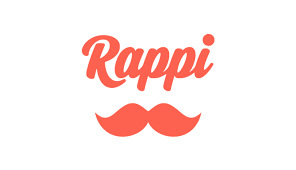

Las empresas que ofrecen el servicio a domicilio han ido en auge tomando cada vez más importancia dentro de la sociedad, desde favores y encargos hasta el servicio a domicilio de alimentos, Rappi es uno de los grandes exponentes de esta industria y ha asentado bases dentro de la sociedad que hasta el día de hoy su aplicación se ha vuelto indispensable para muchas personas. 

Uno de los grandes problemas de pueden afrontar dichas empresas son sus tarifas de entrega que, además del precio de la compra o favor que se encarga, es un costo extra que los clientes tienen muy presentes y pueden ser lo que define si un cliente hace el encargo o no.

Para la investigación se debe tener en cuenta que los datos recopilados son de Bogotá, Colombia y están enfocados en el servicio a domicilio de alimentos en este caso. Se sabe Rappi no es la única aplicación de servicios a domicilio en el mercado, es una de las principales, pero siempre que haya una mejor oferta o una menor tarifa de entrega por el mismo producto en otra aplicación, obviamente significaría que no usarán Rappi.

Para determinar las preferencias de cantidad de pagos por envío se tendrán en cuenta como variables el precio del pedido, costo del pedido, categoría del pedido y la relación precio-costo de envío que tienen los pedidos para tener unas simulaciones representativas del contexto.


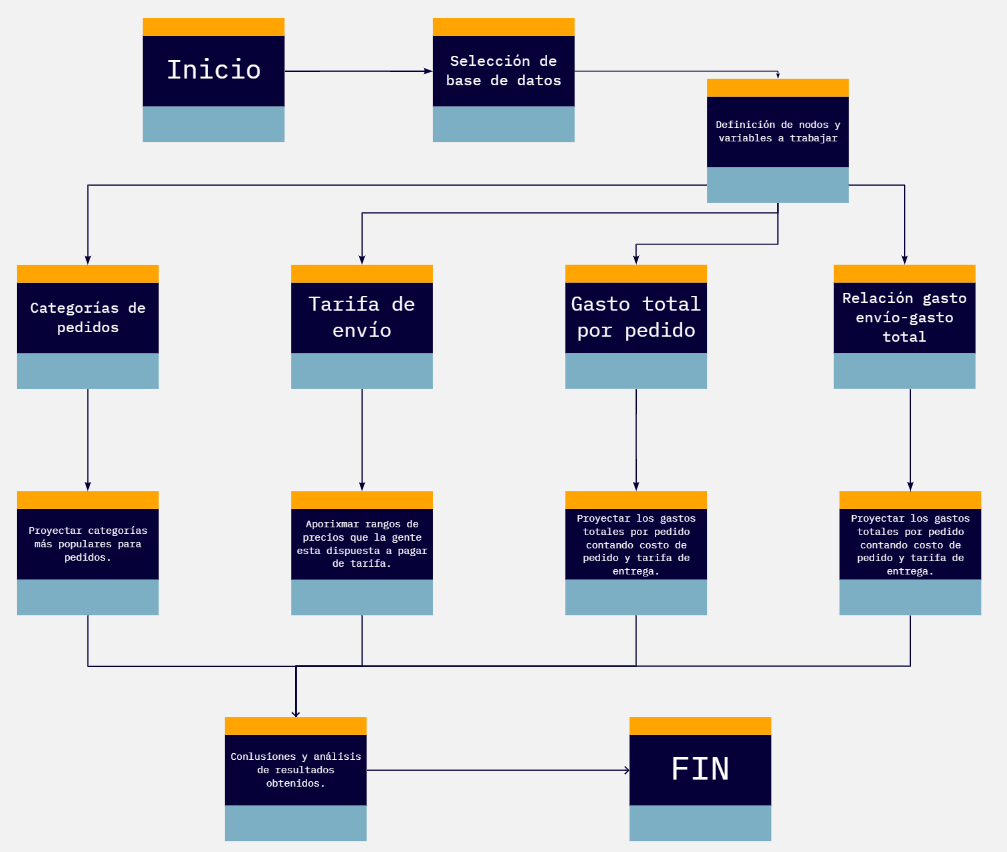

In [1]:
from IPython.display import Image
Image("Diagrama.png")

### Nodos
   - Determinar la relación sobre cuánto la gente gasta en envíos en base a lo que gasta en sus pedidos. Con esto se sabrá lo que la gente está dispuesta a pagar de envío dependiendo del costo de su pedido.
   - Encontrar los rangos de costo total del pedido para determinar el promedio de gasto que tienen las personas al hacer un encargo.
   - Encontrar las categorías donde la gente gasta más en envíos. Con esto se podrá determinar de entre tantas categorías de comida que ofrece el servicio, cúal es la más popular.
   - Encontrar rangos de gasto promedio por envío. Esto permite saber un aproximado de lo que la gente esta dispuesta a pagar por envío y la frecuencia con que se paga esa cantidad de envío.
   

### Variables
 - Tipo de comercio
 - Gasto de envío
 - Total Gastado
 - Porcentaje de gasto de envió de la compra

En el tipo de comercio se encuentran las categorías de alimentos que se encuentran dentro de la aplicación.

El gasto de envío es el precio total de la gente que pagó exclusivamente por la tarifa de entrega de su pedido.

Total gastado es la suma del precio de su pedido y de la tarifa de entrega, p sea, el total a pagar del cliente por su consumo y servicio de la aplicación.

El porcentaje de gasto de envío de la compra representa la cantidad en porcentaje que el usuario pagó de envío respecto al total de su compra.

### Hipótesis:
 - Habrá más volumen de pedidos si la tarifa de entrega es más barata que el promedio.
 - Las personas están dispuestas a pagar más de tarifa envío si la compra es mas grande.
 
### Supuestos:
 - La información obtenida es de la aplicación de servicios a domicilio y encargos de Rappi.
 - La información recopilada fue en el transcurso de 2 horas en la ciudad de Bogotá, Colombia. Por lo que la moneda que se maneja dentro del proyecto son pesos colombianos. (1 MXN ≈ 190 COP)
 - Las variables selectas son las que nos ayudarán a comprender mejor la situación.

### Obtención de base de datos

https://www.kaggle.com/alexbonella/sales-simulation-at-rappi

In [2]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle  
import matplotlib.pyplot as plt
import scipy.stats as st     
import pandas as pd
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm 
import matplotlib 
from scipy.stats import loglaplace 
from scipy.stats.distributions import norm 
from sklearn.model_selection import GridSearchCV
from statistics import mode
from statistics import mean
import statistics


### Base de datos

In [3]:
data = pd.read_csv('Sales_simulation.csv')
data.head()

,Unnamed: 0,purchase_ID,Date at created,Category,Name,Purchase Price,Delivery Price,Total
0,0,1,21-10-2020 14:42:55.373979,Saludable · Desayunos,Distrito Gourmet,10700,3700,14400
1,1,2,21-10-2020 14:42:55.483563,Postres,Toledo Pastelería,53900,6800,60700
2,2,3,21-10-2020 14:42:55.739536,Postres · Helados,Mahé,7500,6000,13500
3,3,4,21-10-2020 14:42:55.945560,Hamburguesas · Saludable,Restaurant Inn,23000,6100,29100
4,4,5,21-10-2020 14:42:56.201561,Postres · Desayunos,Maria Luisa - Postres,9000,4300,13300


In [4]:
data = data.drop(["Unnamed: 0"], axis=1)
data = data.drop(["purchase_ID"], axis=1)
data = data.drop(["Date at created"], axis=1)
data = data.drop(["Name"], axis=1)
data.head()

,Category,Purchase Price,Delivery Price,Total
0,Saludable · Desayunos,10700,3700,14400
1,Postres,53900,6800,60700
2,Postres · Helados,7500,6000,13500
3,Hamburguesas · Saludable,23000,6100,29100
4,Postres · Desayunos,9000,4300,13300


Se eliminaron columnas de datos basura de la base de datos.

In [5]:
data["Porcentaje"] = (data["Delivery Price"] / data["Total"])*100
data.head()

,Category,Purchase Price,Delivery Price,Total,Porcentaje
0,Saludable · Desayunos,10700,3700,14400,25.694444
1,Postres,53900,6800,60700,11.202636
2,Postres · Helados,7500,6000,13500,44.444444
3,Hamburguesas · Saludable,23000,6100,29100,20.962199
4,Postres · Desayunos,9000,4300,13300,32.330827


Filtramos las variables que se iban a requerir para este proyecto y además agregamos la variable de "Porcentaje" que representa el porcentaje de costo que tiene el envío sobre el total del pedido.

## Nodo 1
- Determinar la relación sobre cuánto la gente gasta en envíos en base a lo que gasta en sus pedidos.

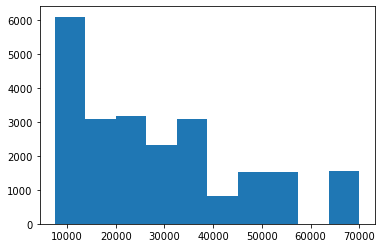

In [6]:
plt.hist(data["Purchase Price"], bins = 10)
plt.show()

In [7]:
media = mean(data["Purchase Price"])
minima = min(data["Purchase Price"])
maxima = max(data["Purchase Price"])

print("El promedio de precio de compras por pedido es de $", media)
print("La mínima compra afectuada fue de $", minima)
print("La máxima compra realizada fue de $", maxima)

El promedio de precio de compras por pedido es de $ 28588.240206629358
La mínima compra afectuada fue de $ 7500
La máxima compra realizada fue de $ 70000


Como se puede observar en el histograma la categoría que ronda los $10,000 pesos es la que tiene más pedidos efectuados, y a medida que el precio va subiendo cada vez hay menos pedidos.

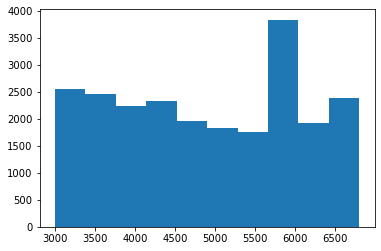

In [8]:
plt.hist(data["Delivery Price"], bins = 10)
plt.show()

In [9]:
media = mean(data["Delivery Price"])
minima = min(data["Delivery Price"])
maxima = max(data["Delivery Price"])

print("El promedio de precio de encargo por pedido es de $", media)
print("El mínima precio de encargo fue de $", minima)
print("El máximo precio de encargo fue de $", maxima)

El promedio de precio de encargo por pedido es de $ 4901.45071028842
El mínima precio de encargo fue de $ 3000
El máximo precio de encargo fue de $ 6800


El rango de costo de entrega a la que la gente esta dispuesta a pagar va desde los 3,000 pesos hasta los 6,800 pesos, mientras que el promedio del costo de entrega es de $4,900.

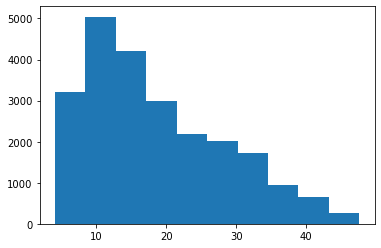

In [10]:
plt.hist(data["Porcentaje"], bins = 10)
plt.show()

In [11]:
media = mean(data["Porcentaje"])
minima = min(data["Porcentaje"])
maxima = max(data["Porcentaje"])


print("El promedio de porcentaje de gasto por pedido es de", media,"%")
print("El mínimo porcentaje de compra fue", minima,"%")
print("El máximo porcentaje de compra fue", maxima,"%")


El promedio de porcentaje de gasto por pedido es de 18.59462350164813 %
El mínimo porcentaje de compra fue 4.10958904109589 %
El máximo porcentaje de compra fue 47.55244755244755 %


Se puede observar que la gente en promedio paga hasta un 18%-19% del precio total de su pedido como tarifa de entrega.

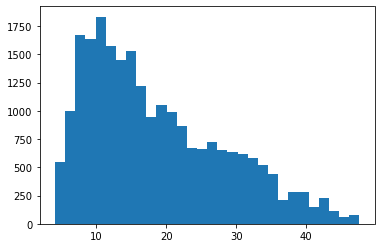

In [12]:
porcentaje = data["Porcentaje"]
plt.hist(porcentaje, bins = 30)
plt.show()

In [13]:
import numpy as np
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric.kernel_density import KDEMultivariate

def kde_scipy(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scipy"""
    # Note that scipy weights its bandwidth by the covariance of the
    # input data.  To make the results comparable to the other methods,
    # we divide the bandwidth by the sample standard deviation here.
    kde = gaussian_kde(x, bw_method=bandwidth / x.std(ddof=1), **kwargs)
    return kde.evaluate(x_grid)


def kde_statsmodels_u(x, x_grid, bandwidth=0.2, **kwargs):
    """Univariate Kernel Density Estimation with Statsmodels"""
    kde = KDEUnivariate(x)
    kde.fit(bw=bandwidth, **kwargs)
    return kde.evaluate(x_grid)
    
    
def kde_statsmodels_m(x, x_grid, bandwidth=0.2, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',  #bandwidth * np.ones_like(x),
                          var_type='c', **kwargs)
    return kde.pdf(x_grid)


def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)


kde_funcs = [kde_statsmodels_u, kde_statsmodels_m, kde_scipy, kde_sklearn]
kde_funcnames = ['Statsmodels-U', 'Statsmodels-M', 'Scipy', 'Scikit-learn']

print( "Package Versions:")
import sklearn; print( "  scikit-learn:", sklearn.__version__)
import scipy; print ("  scipy:", scipy.__version__)
import statsmodels; print( "  statsmodels:", statsmodels.__version__)

Package Versions:
  scikit-learn: 0.24.1
  scipy: 1.6.2
  statsmodels: 0.12.2


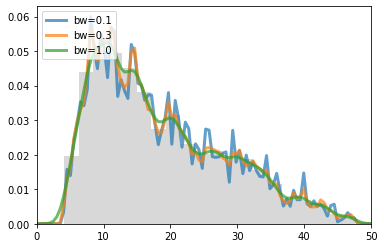

In [14]:
x_grid=np.linspace(0, 50, 100)
fig, ax = plt.subplots()
for bandwidth in [0.1, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(data["Porcentaje"], x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(data["Porcentaje"], 20, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(0, 50)
ax.legend(loc='upper left')

In [15]:
import seaborn as sns

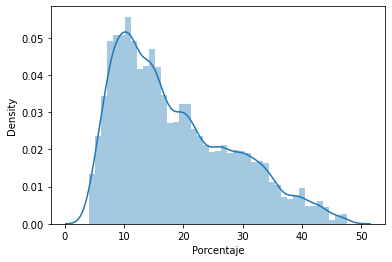

In [16]:
ax = sns.distplot(porcentaje)

<AxesSubplot:xlabel='Porcentaje', ylabel='Density'>

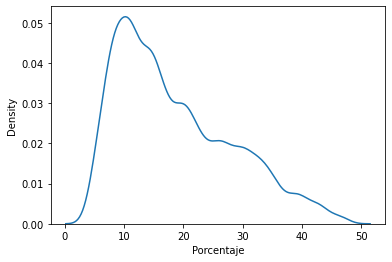

In [17]:
pron=sns.kdeplot(porcentaje)
pron

In [18]:
desvest=statistics.stdev(data["Porcentaje"])
print("mu =", media)
print("sigma =", desvest)

mu = 18.59462350164813
sigma = 9.782888708193019


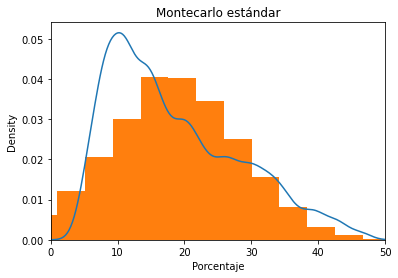

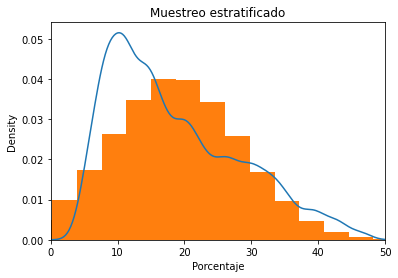

In [19]:
N = 10000
# (Método transformada inversa visto en clases pasadas) d.normal
mu = media
sigma = desvest


# Método montecarlo estándar para distribución normal
montecarlo_standar = st.norm(mu, sigma).ppf(np.random.rand(N))
sns.kdeplot(porcentaje)
plt.hist(montecarlo_standar,20,density=True)
plt.title('Montecarlo estándar')
plt.xlim((0, 50))
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(N)
m_estratificado = st.norm(mu, sigma).ppf((U2 + np.arange(0, B)) / B)
sns.kdeplot(porcentaje)
plt.hist(m_estratificado,20,density=True)
plt.title('Muestreo estratificado')
plt.xlim((0, 50))
plt.show()

Dadas las gráficas que representan los datos generados con montecarlo estándar y con el muestreo estratificado, se puede asegurar que existe cierta similitud a la distribución de datos reales. La cantidad de datos utilizados en la simulación fue de 10,000 lo que representa aproximadamente 1 hora del muestreo original que es de 2 horas.

In [20]:
print("Promedio de % de datos aleatorios:", montecarlo_standar.mean(),"%")
print("Promedio de % de datos reales:", porcentaje.mean(),"%")
confianza=.95
# Intervalo de confianza 
i1 = st.t.interval(confianza, len(montecarlo_standar)-1, loc=np.mean(montecarlo_standar), scale=st.sem(montecarlo_standar))

# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(confianza, loc=np.mean(montecarlo_standar), scale=st.sem(montecarlo_standar))

# Error entre medias real y aleatoria estimada
error = abs(np.array(porcentaje.mean() - montecarlo_standar.mean())/montecarlo_standar.mean())*100

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Error medio entre porcentajes:', error,"%")

Promedio de % de datos aleatorios: 18.42358557805384 %
Promedio de % de datos reales: 18.59462350164816 %
Con una confianza de 0.95 la media estará en el intervalo t,
 (18.231138955071575, 18.616032201036102)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (18.231162250413103, 18.616008905694574)
Error medio entre porcentajes: 0.9283639325781575 %


In [21]:
# Intervalo de confianza 
i1 = st.t.interval(confianza, len(m_estratificado)-1, loc=np.mean(m_estratificado), scale=st.sem(m_estratificado))

# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(confianza, loc=np.mean(m_estratificado), scale=st.sem(m_estratificado))

# Error entre medias real y aleatoria estimada
error = abs(np.array(porcentaje.mean() - m_estratificado.mean())/m_estratificado.mean())*100

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Error medio entre porcentajes:', error,"%")

Con una confianza de 0.95 la media estará en el intervalo t,
 (18.40286613117177, 18.786364171721885)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (18.40288934206966, 18.786340960823996)
Error medio entre porcentajes: 4.49065563655406e-05 %


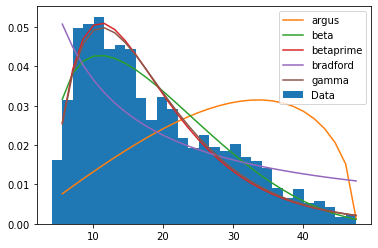

In [22]:
y, x ,_ = plt.hist(data['Porcentaje'], bins=29, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[3:7] + ['gamma']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(data['Porcentaje'])
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show();

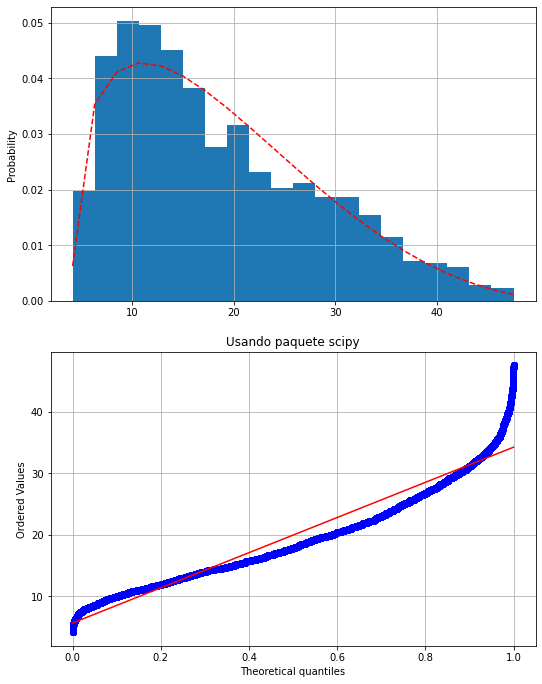

In [23]:
# Prueba Q-Q
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(np.array(porcentaje), bins=20, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(np.array(porcentaje))

y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap2 = st.probplot(np.array(porcentaje), dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.show()

Si la tendencia general de la gráfica Q-Q es más plana que la línea y = x, la distribución representada en el eje horizontal está más dispersa que la distribución representada en el eje vertical. En este caso la distribución de los rangos de los porcentajes está más cargada hacia un lado por lo que se ve reflejado en esta gráfica. Hubo más pedidos en los porcentajes más cargados hacia la izquierda de la gráfica original de datos.

### Conclusión:
La relación que tiene el precio de envio con el pago total demuestra un comportamiento en grafica de una distribucion asimetrica positiva, en el cual se puede apreciar que entre 18.5-19% es lo que mayormente estan dispuestos a pagar los consumidores y a medida que se eleva el precio del envio se empieza a disminuir la cantidad de compras.

### Nodo 2
   - Encontrar los rangos de costo total del pedido para determinar el promedio de gasto que tienen las personas al hacer un encargo.

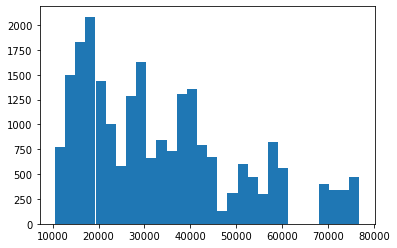

In [24]:
total = data["Total"]
plt.hist(total, bins = 30)
plt.show()

In [25]:
media_t = mean(data["Total"])
minima = min(data["Total"])
maxima = max(data["Total"])

print("El promedio de precio total por pedido fue de $", media_t)
print("El mínimo pedido recibido fue de $", minima)
print("El máximo pedido recibido fue de $", maxima)

El promedio de precio total por pedido fue de $ 33489.69091691778
El mínimo pedido recibido fue de $ 10500
El máximo pedido recibido fue de $ 76800


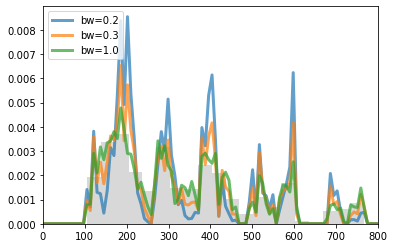

In [26]:
x_grid=np.linspace(0, 800, 100)
fig, ax = plt.subplots()
for bandwidth in [0.2, 0.3, 1.0]:
    ax.plot(x_grid, kde_sklearn(data["Total"]/100, x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(data["Total"]/100, 20, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(0, 800)
ax.legend(loc='upper left')

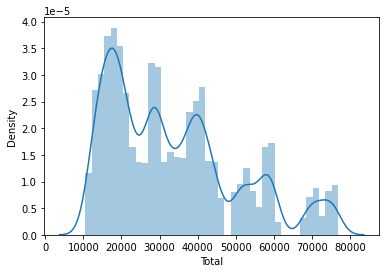

In [27]:
ax = sns.distplot(total)

<AxesSubplot:xlabel='Total', ylabel='Density'>

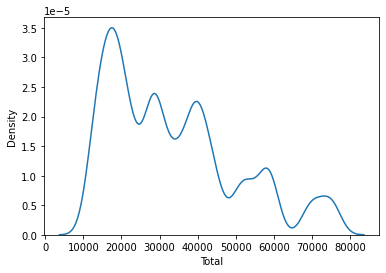

In [28]:
pron2 =sns.kdeplot(total)
pron2

In [29]:
desvest2 = statistics.stdev(total)
print("mu =", media_t)
print("sigma =", desvest2)

mu = 33489.69091691778
sigma = 16867.15924078914


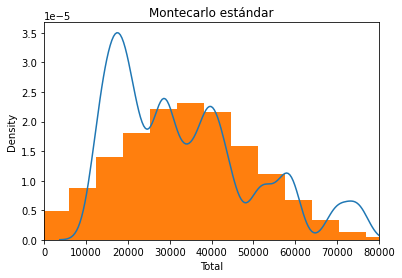

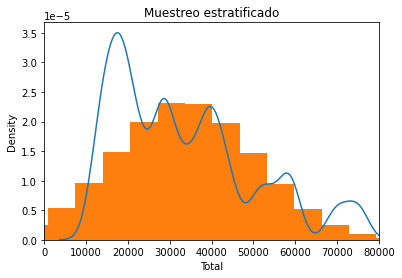

In [30]:
N = 10000
# (Método transformada inversa visto en clases pasadas) d.normal
mu = media_t
sigma = desvest2


# Método montecarlo estándar para distribución normal
montecarlo_standar = st.norm(mu, sigma).ppf(np.random.rand(N))
sns.kdeplot(total)
plt.hist(montecarlo_standar,20,density=True)
plt.title('Montecarlo estándar')
plt.xlim((0, 80000))
plt.show()

# Método muestreo estratificado (B estratos)
B = N
U2 = np.random.rand(N)
m_estratificado = st.norm(mu, sigma).ppf((U2 + np.arange(0, B)) / B)
sns.kdeplot(total)
plt.hist(m_estratificado,20,density=True)
plt.title('Muestreo estratificado')
plt.xlim((0, 80000))
plt.show()

Hicimos simulaciones de 10,000 datos para representar aproximadamente la cantidad de pedidos que se iban a realizar en el lapso de 1 hora, la gráfica espectro azul del fondo representa las tendencias que tenían los datos originales y la naranja son las simulaciones de montecarlo estándar y el muestreo estratificado. Tiene cierta similitud en la distribución de densidad de pedidos realizados, pero aún se puede observar que no son muy precisas dichas gráficas resepcto a la distribución original.

In [31]:
print("Promedio de $ de datos aleatorios:", montecarlo_standar.mean())
print("Promedio de $ de datos reales:", total.mean())
confianza=.95
# Intervalo de confianza 
i1 = st.t.interval(confianza, len(montecarlo_standar)-1, loc=np.mean(montecarlo_standar), scale=st.sem(montecarlo_standar))

# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(confianza, loc=np.mean(montecarlo_standar), scale=st.sem(montecarlo_standar))

# Error entre medias real y aleatoria estimada
error = abs(np.array(total.mean() - montecarlo_standar.mean())/montecarlo_standar.mean())*100

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Error medio entre promedios:', error,"%")

Promedio de $ de datos aleatorios: 33502.36087340484
Promedio de $ de datos reales: 33489.69091691778
Con una confianza de 0.95 la media estará en el intervalo t,
 (33170.161869980686, 33834.55987682899)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (33170.20208211391, 33834.51966469577)
Error medio entre promedios: 0.037818100446513826 %


In [32]:
# Intervalo de confianza 
i1 = st.t.interval(confianza, len(m_estratificado)-1, loc=np.mean(m_estratificado), scale=st.sem(m_estratificado))

# Intervalo de confianza usando distribución normal
i2 = st.norm.interval(confianza, loc=np.mean(m_estratificado), scale=st.sem(m_estratificado))

# Error entre medias real y aleatoria estimada
error = abs(np.array(total.mean() - m_estratificado.mean())/m_estratificado.mean())*100

print('Con una confianza de %2.2f la media estará en el intervalo t,\n %s     ' %(confianza,i1))
print('Con una confianza de %2.2f la media estará en el intervalo normal,\n %s' %(confianza,i2))
print('Error medio entre promedios:', error,"%")

Con una confianza de 0.95 la media estará en el intervalo t,
 (33159.15389329624, 33820.395381097784)     
Con una confianza de 0.95 la media estará en el intervalo normal,
 (33159.19391438378, 33820.355360010246)
Error medio entre promedios: 0.00024998758617741197 %


Analizando los datos se puede observar que con los datos estratratificados se muestra un error mucho menor que si se toman los datos generados con el método montecarlo.

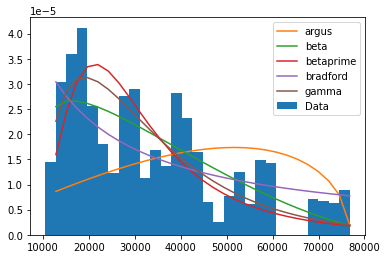

In [33]:
y, x ,_ = plt.hist(data['Total'], bins=29, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = dist[3:7] + ['gamma']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(data['Total'])
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.show();

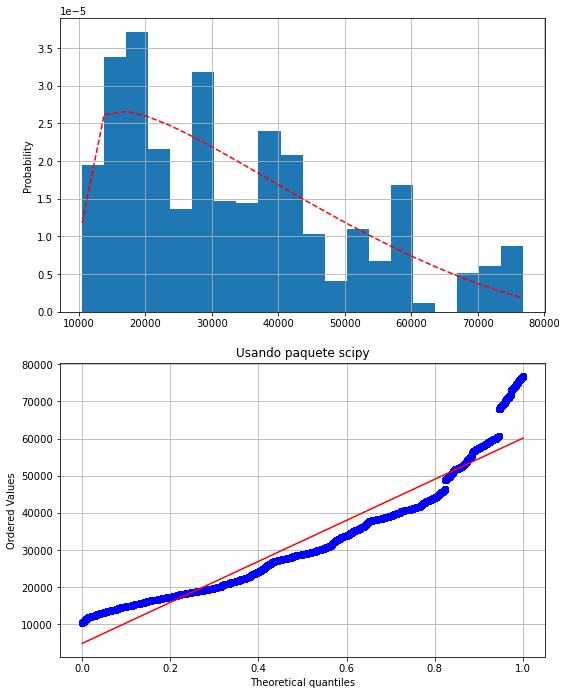

In [34]:
# Prueba Q-Q
fig, ax = plt.subplots(2,1, figsize=(8,10))
fig.tight_layout(pad=3.0)

y, x, _ = ax[0].hist(np.array(total), bins=20, density=True, label='Histograma mediciones')

dist = 'beta'
params = getattr(st, dist).fit(np.array(total))

y_hat = getattr(st, dist).pdf(x, *params)
ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
ax[0].set_ylabel('Probability')
ax[0].grid()

grap2 = st.probplot(np.array(total), dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
ax[1].grid()
ax[1].set_title('Usando paquete scipy')

plt.show()

En este caso la distribución de los rangos de los pedidos por precio total está más cargada hacia un lado por lo que se ve reflejado en esta gráfica.

### Conclusión:
En la gráfica original de los datos se puede observar que se trata de una gráfica asímetrica positiva, donde la mayor parte de concentración de datos se encuentra del lado izquierdo de la gráfica, lo que significa totales de precios de pedido bajos, pero también se puede ver la tendencia de que sibe y baja entre los rangos de precios que resulta interesante destacar. Cuando se trata de cantidad de múltiplos de 10,000 pesos es cuando más demanda hay de pedidos, en las zonas intermedias a estos múltiplos existen bajas en pedidos. Lo que se puede hacer con esta información, Rappi como empresa, podría ofrecer ciertos descuentos o cupones para impulsar aún más las compras por estas cantidades y así los usuarios hagan más pedidos. (10,000 COP ≈ 50 MXN) 

### ------------------------------------------------------------------------

## Nodo 3

En este nodo se abarca los precios en las tarifas de entrega que han pedido los usuarios.

In [35]:
def errores(datos:"Datos a tomar en cuenta"):
    y, x ,_ = plt.hist(datos, bins=29, density=True, label='Data')
    x = x[1:]

    dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
    dist = dist[3:7] + ["gamma"] + ["chi"] + ["chi2"] + ["norm"]
    error = pd.DataFrame(index=dist, columns=['error'])

    for d in dist:
        params= getattr(st,d).fit(datos)
        y_hat = getattr(st, d)(*params).pdf(x)
        error.loc[d]= ((y-y_hat)**2).mean()
        plt.plot(x,y_hat, label=d)
    
    plt.legend()
    plt.show();
    return error

In [36]:
def quantil(datos:"Datos a tomar en cuenta",
            distribucion:"Distribución con menor error"):
    fig, ax = plt.subplots(2,1, figsize=(8,10))
    fig.tight_layout(pad=3.0)

    y, x, _ = ax[0].hist(np.array(datos), bins=29, density=True, label='Histograma mediciones')

    dist = distribucion
    params = getattr(st, dist).fit(np.array(datos))

    y_hat = getattr(st, dist).pdf(x, *params)
    ax[0].plot(x, y_hat,'r--', label='Distribución ajustada')
    ax[0].set_ylabel('Probability')
    ax[0].grid()

    grap2 = st.probplot(np.array(datos), dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
    ax[1].grid()
    ax[1].set_title('Usando paquete scipy')
    
    plt.show()

In [37]:
def stratify(N:"Número de estratos"):
    i = np.arange(0, N)
    U2 = np.random.rand(N)
    strat = (U2+i)/N
    return strat

def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    y = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return y

In [38]:
def kde_sklearn(x, x_grid, bandwidth=0.2, **kwargs):
    """Kernel Density Estimation with Scikit-learn"""
    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(x[:, np.newaxis])
    # score_samples() returns the log-likelihood of the samples
    log_pdf = kde_skl.score_samples(x_grid[:, np.newaxis])
    return np.exp(log_pdf)

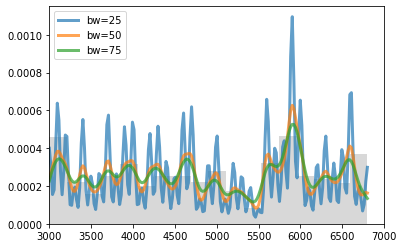

In [39]:
minimo = data["Delivery Price"].min()
maximo = data["Delivery Price"].max()

x_grid=np.linspace(minimo, maximo, 200)
fig, ax = plt.subplots()
for bandwidth in [25, 50, 75]:
    ax.plot(x_grid, kde_sklearn(data["Delivery Price"], x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(data["Delivery Price"], 18, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(3000, 7000)
ax.legend(loc='upper left')

In [40]:
opt = kde_sklearn(data["Delivery Price"],x_grid)
opt = max(opt)*1000
opt

49.9751199297532

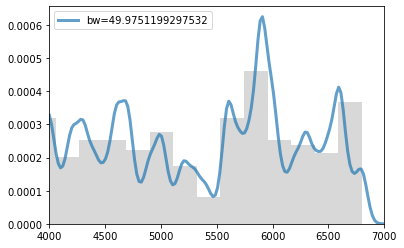

In [41]:
x_grid=np.linspace(4000, 8000, 200)
fig, ax = plt.subplots()
for bandwidth in [opt]:
    ax.plot(x_grid, kde_sklearn(data["Delivery Price"], x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(data["Delivery Price"], 18, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(4000, 7000)
ax.legend(loc='upper left')

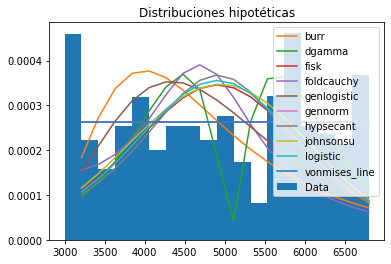

In [42]:
y, x ,_ = plt.hist(data["Delivery Price"], bins=18, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = ['burr', 'dgamma', 'fisk', 'foldcauchy', 'genlogistic', 'gennorm', 'hypsecant',
 'johnsonsu','logistic','vonmises_line']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(data["Delivery Price"])
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.title("Distribuciones hipotéticas")
plt.show()

In [43]:
error.T

,burr,dgamma,fisk,foldcauchy,genlogistic,gennorm,hypsecant,johnsonsu,logistic,vonmises_line
error,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
params = st.dgamma.fit(x)
pi = st.dgamma.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  21.73854049932947
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=21.73854049932947, pvalue=0.19498434354252786)
Estadístico de chi_cuadrado =  27.58711163827534


No se puede rechazar la $H_0$ porque los valores de chi cuadrada teorica y librería son menores al estadístico, por lo que no se puede rechazar que los datos tienen una distribución dgamma.

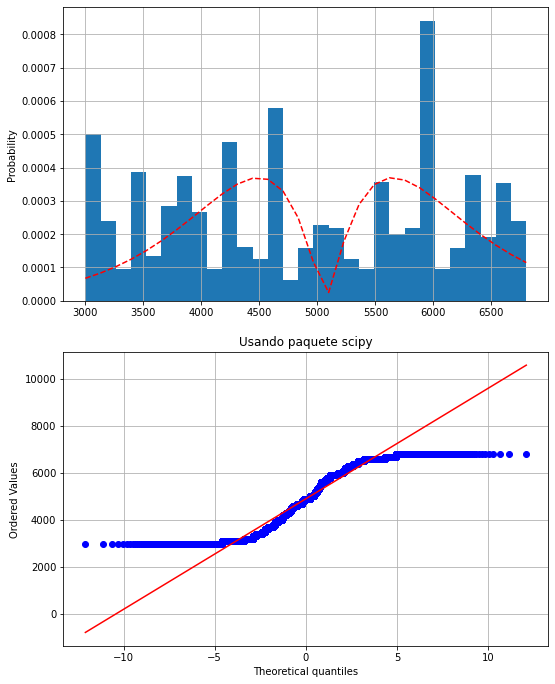

In [45]:
quantil(data["Delivery Price"], "dgamma")

In [46]:
# Prueba de Kolmogorov
media, desvest = st.norm.fit(data["Delivery Price"])
media, desvest

(4901.45071028842, 1147.2597592856107)

In [47]:
d, pvalue = st.kstest(data["Delivery Price"], "norm", args=(media,desvest))
d, pvalue

(0.12039145318642575, 7.368126018684583e-294)

Para este punto se sabe que los datos no tienen una distribución normal y por lo tanto se rechaza la hipótesis que así lo plantea por la media y desviacion que lo conforman. Se seguirá utilizando la distribución dgamma que es la que mejor se acopla a los datos.

In [48]:
np.random.seed(515)

N = 10000

# Con montecarlo crudo
muestras = st.dgamma.rvs(*params,size=N)
media_m = muestras.mean()

print("La media real de los datos de tarifas es:", data["Delivery Price"].mean())
print("La media muestral de los datos con nuestra distribución dgamma es:", media_m)

La media real de los datos de tarifas es: 4901.45071028842
La media muestral de los datos con nuestra distribución dgamma es: 4999.199801996532


In [49]:
np.random.seed(515)

confianza = .95

# Intervalo de confianza 
i1 = st.norm.interval(confianza, loc=np.mean(muestras), scale=st.sem(muestras))

# Error entre medias real y aleatoria estimada
error = abs(np.array(data["Delivery Price"].mean() - media_m)/media_m)*100

print('Con una confianza de %2.2f la media estará en el intervalo \n %s     ' %(confianza,i1))
print('Error porcentual entre medias:', error,"%")


Con una confianza de 0.95 la media estará en el intervalo 
 (4976.504792665883, 5021.894811327182)     
Error porcentual entre medias: 1.955294758754674 %


In [50]:
np.random.seed(515)

# Estratificado
u = stratify(N)
pacum = st.dgamma.cdf(muestras,*params)
func = lambda u: Gen_distr_discreta(pacum, muestras, N)
media_e = np.mean(func(u))
media_e

5021.286046989749

In [51]:
np.random.seed(515)

confianza = .95
muestras_e = func(u)
w = muestras_e.dropna()

# Intervalo de confianza 
i1 = st.norm.interval(confianza, loc=np.mean(w), scale=st.sem(w))

# Error entre medias real y aleatoria estimada
error = abs(np.array(data["Delivery Price"].mean() - media_e)/media_e)*100

print('Con una confianza de %2.2f la media estará en el intervalo \n %s     ' %(confianza,i1))
print('Error porcentual entre medias:', error,"%")

Con una confianza de 0.95 la media estará en el intervalo 
 (5000.514056550849, 5046.226533080718)     
Error porcentual entre medias: 2.3865467049655495 %


Para este nodo la elección de la mejor distribución que presenta el menor error fue por medio manual a prueba y error, visualmente era la distribución que mejor se acoplaba a los datos reales y en los errores de los métodos que usamos para calcular sus intervalos así resultaron, con el método de montecarlo crudo regresó un error del 1.95%, mientras que con el método estratificado de 2.38%. Podemos decir que el método montecarlo es un poco más exacto si nos referimos a cuestión de errores.

### Nodo 4

A partir de la sección de categorías se eligirá la categoría más popular entre los usuarios y a partir de ahí filtraremos dichos datos para basarnos en los totales de sus pedidos para hacer simulaciones.

In [52]:
data["Category"].mode()

0    Postres · Desayunos
dtype: object

In [53]:
postres = data['Category'] == "Postres · Desayunos"
postres.head()

0    False
1    False
2    False
3    False
4     True
Name: Category, dtype: bool

In [54]:
post = data[postres]
post.head()

,Category,Purchase Price,Delivery Price,Total,Porcentaje
4,Postres · Desayunos,9000,4300,13300,32.330827
9,Postres · Desayunos,8900,6400,15300,41.830065
11,Postres · Desayunos,12500,3300,15800,20.886076
24,Postres · Desayunos,35000,5900,40900,14.425428
27,Postres · Desayunos,12500,6400,18900,33.862434


In [55]:
post.count()

Category          1770
Purchase Price    1770
Delivery Price    1770
Total             1770
Porcentaje        1770
dtype: int64

In [56]:
minimo=post["Total"].min()
maximo=post["Total"].max()

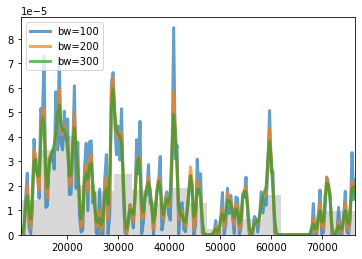

In [57]:
x_grid=np.linspace(minimo, maximo, 200)
fig, ax = plt.subplots()
for bandwidth in [100, 200, 300]:
    ax.plot(x_grid, kde_sklearn(post["Total"], x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(post["Total"], 18, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(minimo, maximo)
ax.legend(loc='upper left')

In [58]:
opt = kde_sklearn(post["Total"],x_grid)
opt = max(opt)*100000
opt

450.7822377417319

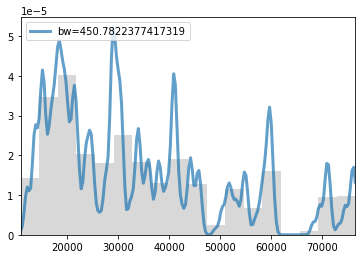

In [59]:
x_grid=np.linspace(minimo, maximo, 200)
fig, ax = plt.subplots()
for bandwidth in [opt]:
    ax.plot(x_grid, kde_sklearn(post["Total"], x_grid, bandwidth=bandwidth),
            label='bw={0}'.format(bandwidth), linewidth=3, alpha=0.7)
ax.hist(post["Total"], 18, fc='gray', histtype='stepfilled', alpha=0.3, density=True)
ax.set_xlim(minimo, maximo)
ax.legend(loc='upper left')

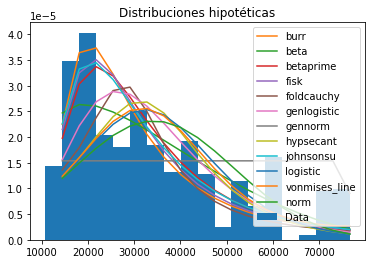

In [60]:
y, x ,_ = plt.hist(post["Total"], bins=18, density=True, label='Data')
x = x[1:]

dist = [d for d in dir(st) if isinstance(getattr(st,d), getattr(st, 'rv_continuous'))]
dist = ['burr','beta','betaprime','fisk','foldcauchy','genlogistic','gennorm','hypsecant',
 'johnsonsu','logistic','vonmises_line', 'norm']
error = pd.DataFrame(index=dist, columns=['error'])

for d in dist:
    params= getattr(st,d).fit(post["Total"])
    y_hat = getattr(st, d)(*params).pdf(x)
    error.loc[d]= ((y-y_hat)**2).mean()
    plt.plot(x,y_hat, label=d)
    
plt.legend()
plt.title("Distribuciones hipotéticas")
plt.show()

In [61]:
error.T

,burr,beta,betaprime,fisk,foldcauchy,genlogistic,gennorm,hypsecant,johnsonsu,logistic,vonmises_line,norm
error,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
params = st.beta.fit(x)
pi = st.beta.pdf(x,*params)
# Cálculo de la esperanza usando la expresión teórica
Ei = x*pi

# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, y)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(y, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = 20-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)

Valor de chi cuadrado teorico  =  14.069773985417598
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=14.069773985417598, pvalue=0.662156883959215)
Estadístico de chi_cuadrado =  27.58711163827534


No se puede rechazar $H_0$ porque las distribuciones de chi cuadrado teorico es menor al estadístico, por lo tanto no se puede rechazar que los datos tengan una distribución beta.

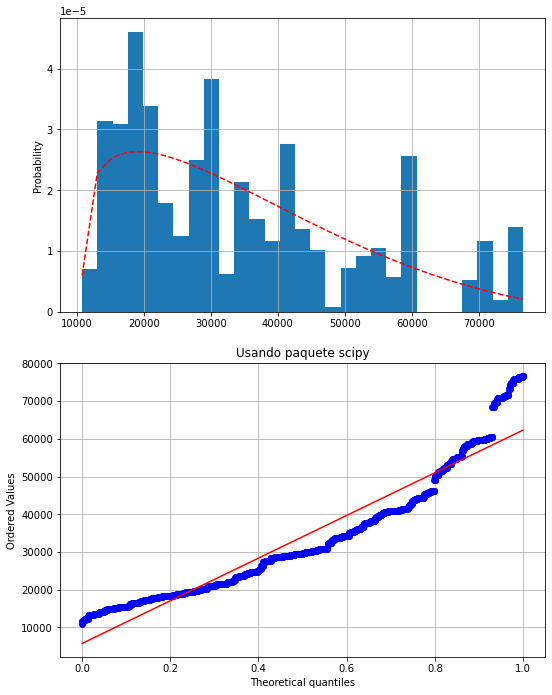

In [63]:
quantil(post["Total"], "beta")

In [64]:
# Prueba de Kolmogorov
media, desvest = st.norm.fit(post["Total"])
media, desvest

(34227.299435028246, 17223.444773972777)

In [65]:
d, pvalue = st.kstest(post["Total"], "norm", args=(media,desvest))
d, pvalue

(0.12574523252323228, 7.450404765517672e-25)

Se sabe que la distribución de los datos no presenta una distribución normal, por lo que se rechaza dicha hipótesis y se seguirá usando la distribución beta que se acopla mejor a los datos.

In [66]:
np.random.seed(515)

N = 1770

# Con montecarlo crudo
muestras = st.beta.rvs(*params,size=N)
media_m = muestras.mean()

print("La media real de los datos de totales es:", post["Total"].mean())
print("La media muestral de los datos con nuestra distribución beta es:", media_m)

La media real de los datos de totales es: 34227.299435028246
La media muestral de los datos con nuestra distribución beta es: 46110.71162177798


In [67]:
np.random.seed(515)

confianza = .95

# Intervalo de confianza 
i1 = st.norm.interval(confianza, loc=np.mean(muestras), scale=st.sem(muestras))

# Error entre medias real y aleatoria estimada
error = abs(np.array(post["Total"].mean() - media_m)/media_m)*100

print('Con una confianza de %2.2f la media estará en el intervalo \n %s     ' %(confianza,i1))
print('Error porcentual entre medias:', error,"%")


Con una confianza de 0.95 la media estará en el intervalo 
 (45267.373113787675, 46954.05012976828)     
Error porcentual entre medias: 25.771478619161503 %


In [68]:
np.random.seed(515)

# Estratificado
u = stratify(N)
pacum = st.beta.cdf(muestras,*params)
func = lambda u: Gen_distr_discreta(pacum, muestras, N)
media_e = np.mean(func(u))
media_e

45443.312311770336

In [69]:
np.random.seed(515)

confianza = .99
muestras_e = func(u)
w = muestras_e.dropna()

# Intervalo de confianza 
i1 = st.norm.interval(confianza, loc=np.mean(w), scale=st.sem(w))

# Error entre medias real y aleatoria estimada
error = abs(np.array(post["Total"].mean() - media_e)/media_e)*100

print('Con una confianza de %2.2f la media estará en el intervalo \n %s     ' %(confianza,i1))
print('Error porcentual entre medias:', error,"%")

Con una confianza de 0.99 la media estará en el intervalo 
 (43779.05647373865, 46004.2369034974)     
Error porcentual entre medias: 24.68132780417288 %


Debido a los problemas que se tuvieron, la elección de distribución que se realizó fue a medida de prueba y error y se seleccionó la distribución beta que fue la que mejor se acopla a la distribución real de los datos, tal que aún así muestra un error de alrededor del 25% en comparación a la escala real de los datos. Para este nodo se puede concluir en que el mejor ajuste es por medio del estratificado, tal que, regresa un error del 24.68% en comparación al montecarlo.